<a href="https://colab.research.google.com/github/prashanth-acsq/Colab-Notebooks/blob/main/MPC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


BASE_PATH = "/content/gdrive/My Drive/Datasets"


def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Library Imports**

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

SEED = 42
sc_X = StandardScaler()

### **Load Data**

In [3]:
train_df = pd.read_csv(os.path.join(BASE_PATH, "mpc-train.csv"))

columns = [col for col in train_df.columns][:-1]

X, y = train_df.iloc[:, :-1].copy().values, train_df.iloc[:, -1].copy().values

X = sc_X.fit_transform(X)

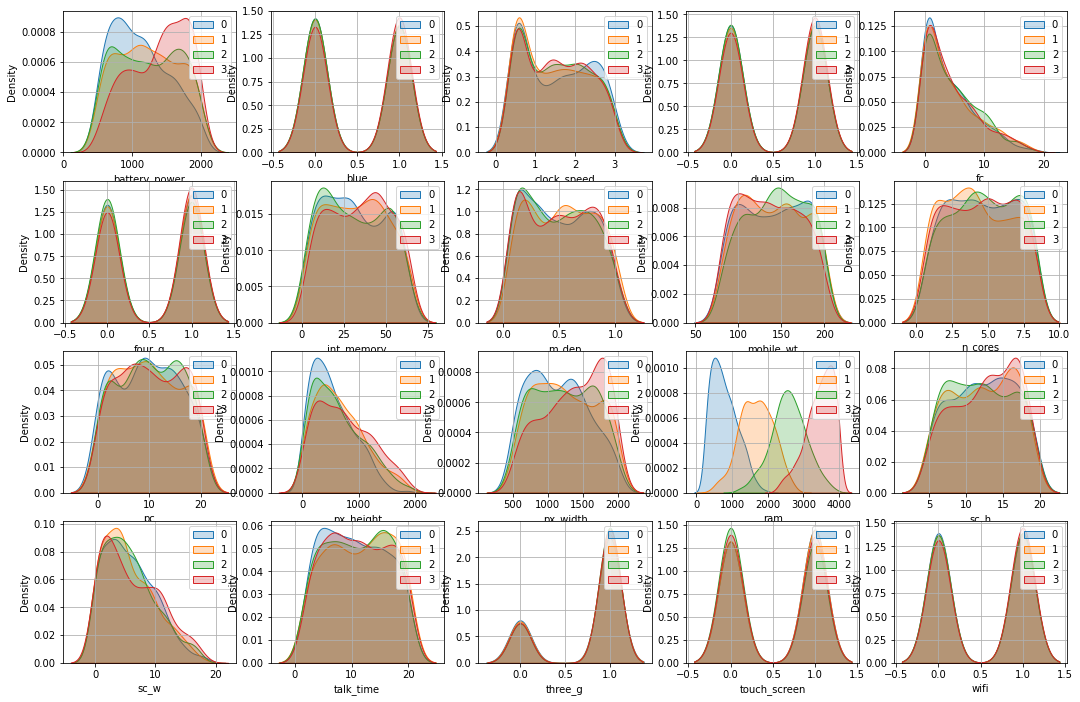

In [4]:
i = 1
plt.figure(figsize=(18, 12))
for column in columns:
    plt.subplot(4, 5, i)
    for c in set(train_df.price_range):
        sns.kdeplot(x=train_df[train_df.price_range == c][column], label=str(c), shade=True)
    plt.legend()
    plt.grid()
    i += 1
plt.show()

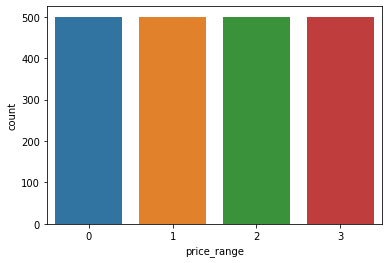

In [5]:
sns.countplot(data=train_df, x="price_range")
plt.show()

### PCA

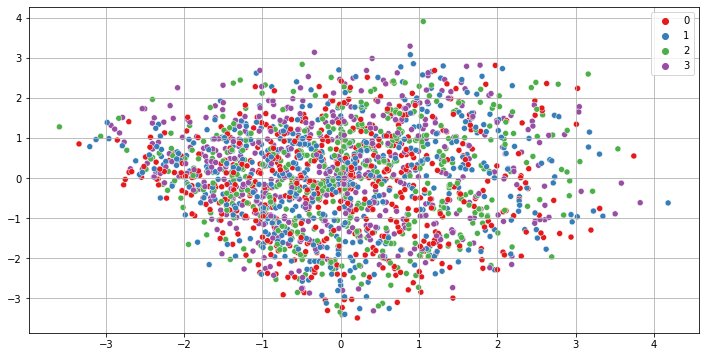

In [6]:
dimr = PCA(n_components=2, random_state=SEED)

new_X = dimr.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=new_X[:, 0], y=new_X[:, 1], hue=y, palette="Set1")
plt.grid()
plt.show()

### **TSNE**

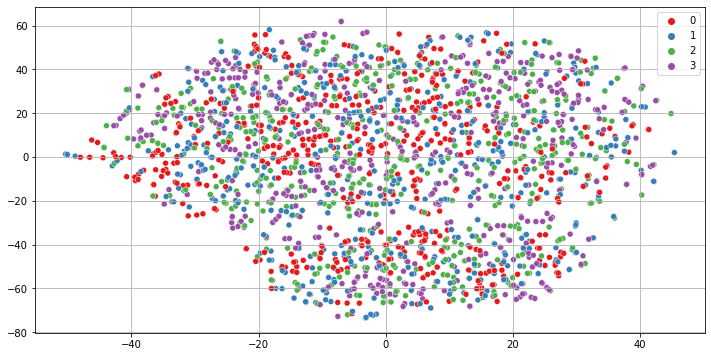

In [7]:
dimr = TSNE(n_components=2, random_state=SEED)

new_X = dimr.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=new_X[:, 0], y=new_X[:, 1], hue=y, palette="Set1")
plt.grid()
plt.show()